In [5]:
import numpy as np
import matplotlib.pyplot as plt

def best(ths, th0s, data, labels):
    """
    Evaluate linear classifiers

    ths:  m d-dimensional column shape: dxm
    th0s: m scalars shape: 1xm
    data: n d-dimensional column (dxn)1
    labels: n 1-dimensional column with value from (1, -1) (1xn)
    """
    scores = np.sum(np.sign(ths.T @ data + th0s.T) == labels, axis=1, keepdims=True)
    best_index = np.argmax(scores)
    best_score = scores[best_index,0]
    return ths[:, best_index:best_index + 1], th0s[:, best_index:best_index + 1], best_score


def random_linear_classifier(data, labels, k):
    ths = -10 + np.random.rand(2, k) * 20
    th0s = -10 + np.random.rand(1, k) * 20
    return best(ths, th0s, data, labels)


In [6]:
# Dataset n = 6
dataset= [[(1, 3), 1], [(-2, -1), 1], [(-1, -1), 1], [(3, 1), -1],  [(1, -1), -1], [(3, -2), -1]]
data = np.array([x for x, y in dataset]).T  # 2x6
labels = [y for x, y in dataset]  # 1x6

best_th, best_th0, score = random_linear_classifier(data, labels, 32)

In [7]:
def get_x2_from_x1(th, th0:float, x1:float):
    th1 = th[0,0]
    th2 = th[1,0]
    return -(th1/th2)*x1 - th0/th2

# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 points between -10 and 10

# Calculate y values using the linear equation
y_values = get_x2_from_x1(best_th, best_th0[0,0], x_values)

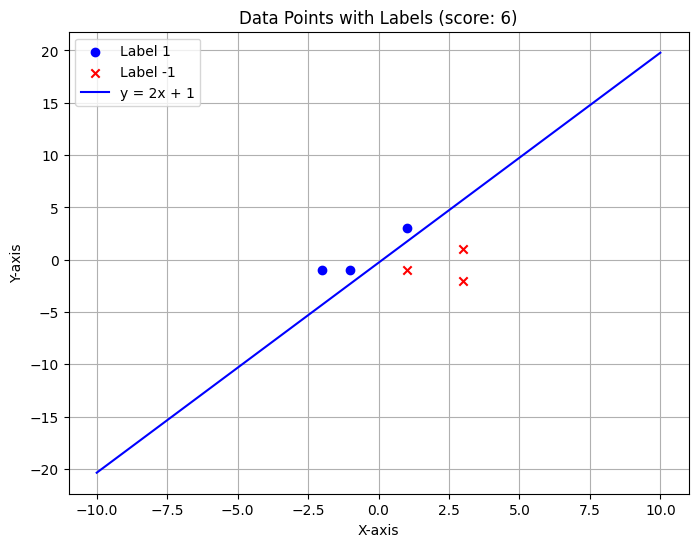

In [8]:



# Separate the data points based on labels
label_1 = [point[0] for point in dataset if point[1] == 1]
label_minus_1 = [point[0] for point in dataset if point[1] == -1]

# Extract x and y coordinates for each label
x_label_1, y_label_1 = zip(*label_1)
x_label_minus_1, y_label_minus_1 = zip(*label_minus_1)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(x_label_1, y_label_1, color='blue', marker='o', label='Label 1')
plt.scatter(x_label_minus_1, y_label_minus_1, color='red', marker='x', label='Label -1')
plt.plot(x_values, y_values, label='y = 2x + 1', color='blue')

# Adding labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'Data Points with Labels (score: {score})')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()